In [ ]:
!pip install pingouin
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg

#Data Exploratory

In [ ]:
Total_data = pd.read_csv('clean_kaggle_data.csv')
Total_data.head()

,ResponseId,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82
0,2,I am a developer by profession,25-34,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,Bachelors degree,Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000
1,3,I am a developer by profession,45-54,"Employed, full-time",Hybrid,Hobby;Professional development or self-paced l...,Bachelors degree,Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000
2,4,I am a developer by profession,25-34,"Employed, full-time",Hybrid,Hobby,Bachelors degree,Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000
3,5,I am a developer by profession,25-34,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,Bachelors degree,Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456
4,6,I am a developer by profession,35-44,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,Other,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828


In [ ]:
Total_data.describe() #quick description for numerical questions

,ResponseId,Q10,Q19,Q64,Q82
count,47840.000000,47840.000000,4.784000e+04,32567.000000,4.784000e+04
mean,42316.885054,15.655560,1.369836e+07,11.438296,9.570318e+04
std,24904.985706,9.847486,5.137395e+08,8.815543,1.396080e+05
min,2.000000,0.000000,1.000000e+00,0.000000,1.000000e+00
25%,21196.750000,8.000000,6.400000e+04,5.000000,4.400000e+04
50%,40967.000000,13.000000,1.150000e+05,9.000000,7.496300e+04
75%,63665.250000,20.000000,2.340000e+05,16.000000,1.216340e+05
max,89172.000000,50.000000,1.000000e+11,50.000000,1.031937e+07


In [ ]:
num_countries = Total_data['Q17'].nunique() #checking number of participating countries
print("Number of unique countries in the survey:", num_countries)

Number of unique countries in the survey: 171


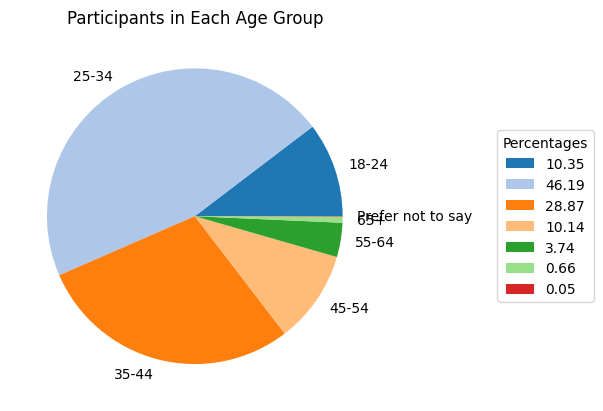

In [ ]:
grouped_age = Total_data.groupby('Q2').size().reset_index(name='age_count') #storing the number of participants in each age group

total_count = grouped_age['age_count'].sum()
age_percentages = ((grouped_age['age_count'] / total_count) * 100).round(2) #manually calculating the age groups percentages for the customized legend

#patches, texts = plt.pie(grouped_age['age_count'], labels=grouped_age['Q2'], colors=plt.cm.tab20.colors)
plt.pie(grouped_age['age_count'], labels=grouped_age['Q2'], colors=plt.cm.tab20.colors)

plt.legend(age_percentages, loc="center left", bbox_to_anchor=(1.3, 0.5), title="Percentages", fontsize='medium') #adding a costomised legend to the right

plt.title('Participants in Each Age Group')
plt.show()

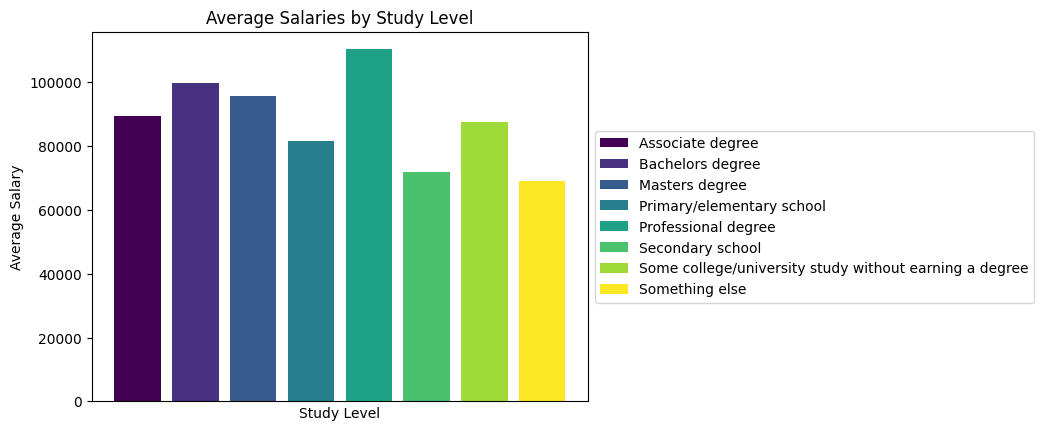

In [ ]:
Edu_v_Salary = Total_data.groupby('Q6')['Q82'].mean() #Storing the average salary by each study level

bars = plt.bar(Edu_v_Salary.index, Edu_v_Salary.values, color=plt.cm.viridis(np.linspace(0, 1, len(Edu_v_Salary)))) #graphing a bar chart showing the study levels vs average salaries
plt.xlabel('Study Level')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Study Level')

plt.legend(bars, Edu_v_Salary.index, loc='center left', bbox_to_anchor=(1, 0.5)) #adding a legend for better reading
plt.xticks([])
plt.show()

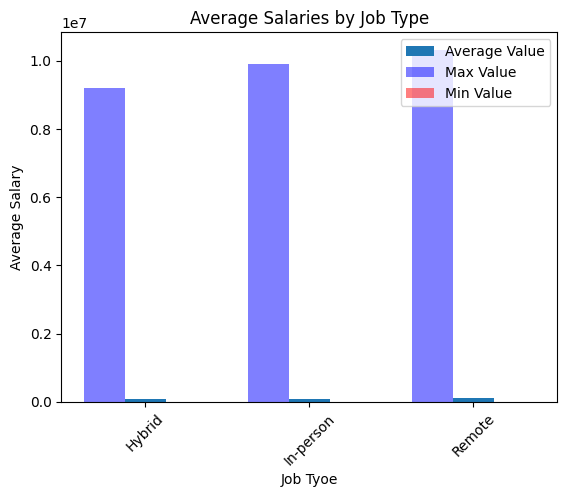

In [ ]:
Type_v_Salary_average = Total_data.groupby('Q4')['Q82'].mean() #storing the average value of salaries gained by each job type without removing the outliers
Type_v_Salary_max = Total_data.groupby('Q4')['Q82'].max() #storing the maximum salary gained by each job type without removing the outliers
Type_v_Salary_min = Total_data.groupby('Q4')['Q82'].min() #storing the minimum salary gained by each job type without removing the outliers

bar_width = 0.25 #specifying the bars width to fit
index = range(len(Type_v_Salary_average.index)) #taking number of job types for  graphing purposes
plt.bar(index, Type_v_Salary_average.values, width=bar_width, label='Average Value') #graphing the average values

# shifting the maximum and minimum bars of each job type to the side
plt.bar([i - bar_width for i in index], Type_v_Salary_max.values, width=bar_width, color='blue', alpha=0.5, label='Max Value')
plt.bar([i + bar_width for i in index], Type_v_Salary_min.values, width=bar_width, color='red', alpha=0.5, label='Min Value')

plt.xlabel('Job Tyoe')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Job Type')
plt.xticks(index, Type_v_Salary_average.index)
plt.xticks(rotation=45)
plt.legend()
plt.show()

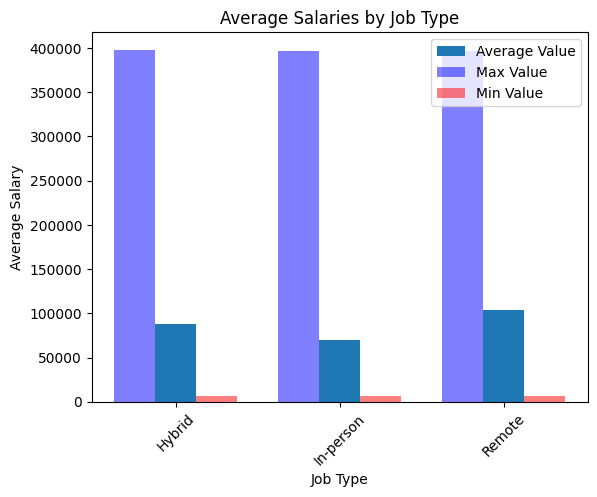

In [ ]:
cleared_data_b = Total_data[Total_data['Q82'] > 6000]
cleared_data = cleared_data_b[cleared_data_b['Q82'] < 400000] #removing outliers, specified only for participants who earns between 6000$ and 400000$

# Re-graphing after removing the outliers

Type_v_Salary_average = cleared_data.groupby('Q4')['Q82'].mean()
Type_v_Salary_max = cleared_data.groupby('Q4')['Q82'].max()
Type_v_Salary_min = cleared_data.groupby('Q4')['Q82'].min()
bar_width = 0.25
index = range(len(Type_v_Salary_average.index))
plt.bar(index, Type_v_Salary_average.values, width=bar_width, label='Average Value')
plt.bar([i - bar_width for i in index], Type_v_Salary_max.values, width=bar_width, color='blue', alpha=0.5, label='Max Value')
plt.bar([i + bar_width for i in index], Type_v_Salary_min.values, width=bar_width, color='red', alpha=0.5, label='Min Value')
plt.xlabel('Job Type')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Job Type')
plt.xticks(index, Type_v_Salary_average.index)
plt.xticks(rotation=45)
plt.legend()
plt.show()

#Job Type Salary Difference Exploration

In [ ]:
#separating the two job types data
remote_data = cleared_data[cleared_data['Q4'] == 'Remote']
In_person_data = cleared_data[cleared_data['Q4'] == 'In-person']

##Data Explatory

In [ ]:
remote_data['Q82'].describe() #quick dicreption of the remote jobs salaries

count     19959.000000
mean     104069.854101
std       66982.016034
min        6058.000000
25%       53545.000000
50%       90000.000000
75%      144000.000000
max      396623.000000
Name: Q82, dtype: float64

In [ ]:
In_person_data['Q82'].describe() #quick dicreption of the in-person jobs salaries

count      5802.000000
mean      69968.504998
std       56300.532709
min        6034.000000
25%       32127.000000
50%       56188.000000
75%       91026.000000
max      397000.000000
Name: Q82, dtype: float64

##Two Sample T-Test

In [ ]:
t_statistic, p_value = stats.ttest_ind(a=remote_data['Q82'], b=In_person_data['Q82'], equal_var=False) #performing a 2 sample test

print("T-Statistic:", t_statistic) #printing the results
print("P-Value:", p_value)

if p_value < 0.05: #checking hypothesis rejection
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")

T-Statistic: 38.83409878927855
P-Value: 2.658186386157743e-309
Reject the null hypothesis. There is a significant difference between the two groups.


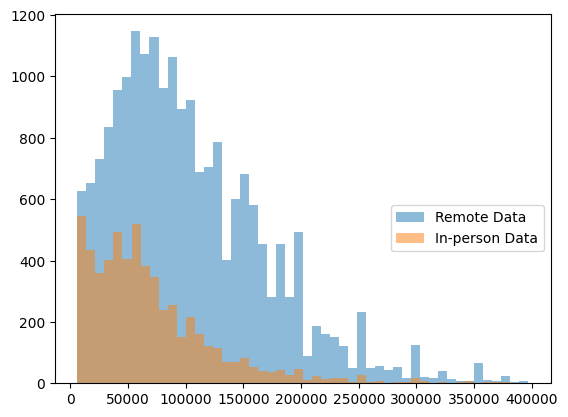

In [ ]:
plt.hist(remote_data['Q82'], bins=50, alpha=0.5, label='Remote Data') #quick graph to check the skewed data
plt.hist(In_person_data['Q82'], bins=50, alpha=0.5, label='In-person Data')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

##Bootstrapping The Data

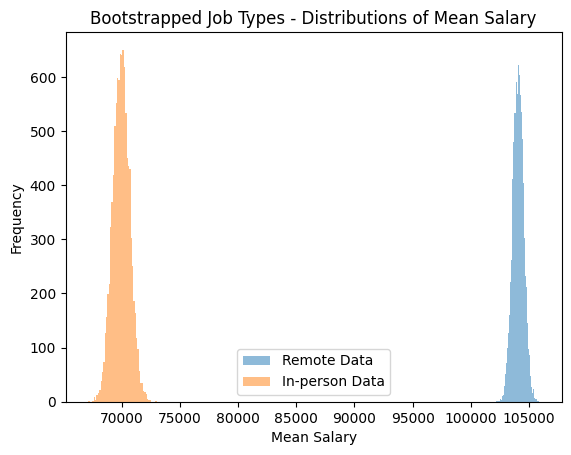

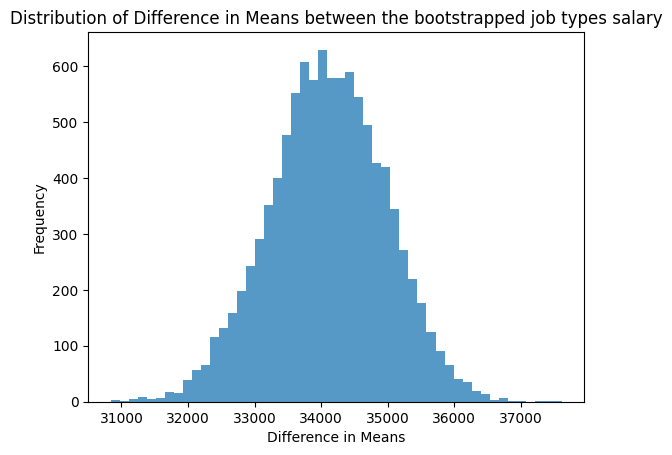

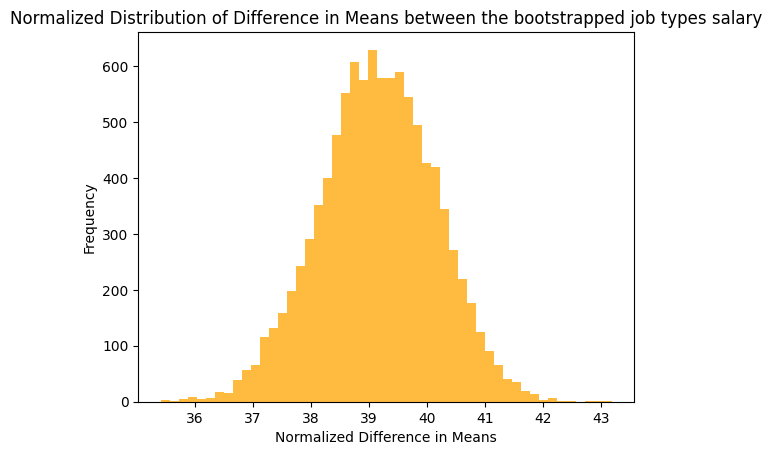

In [ ]:
def bootstrap(data, num_samples): #creating a function to get random samples group from the original data
    n = len(data)
    indices = np.random.choice(n, (num_samples, n), replace=True)
    samples = data[indices]
    return samples

num_replications = 10000 # Number of replications

remote_bootstraps = bootstrap(remote_data['Q82'].values, num_replications) #bootstrap sampling for each group
in_person_bootstraps = bootstrap(In_person_data['Q82'].values, num_replications)

remote_means = np.mean(remote_bootstraps, axis=1) #calculating the mean salary of each bootstrap sample for each group
in_person_means = np.mean(in_person_bootstraps, axis=1)

diff_means = remote_means - in_person_means #computing the difference in means between both groups
normal_diff_means = diff_means / np.std(diff_means)

plt.hist(remote_means, bins=50, alpha=0.5, label='Remote Data') #graphing the frequency of each group bootsrapped means
plt.hist(in_person_means, bins=50, alpha=0.5, label='In-person Data')
plt.title('Bootstrapped Job Types - Distributions of Mean Salary')
plt.xlabel('Mean Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(diff_means, bins=50, alpha=0.75) #graphing the difference in means
plt.title('Distribution of Difference in Means between the bootstrapped job types salary')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

#plt.figure(figsize=(8, 6))
plt.hist(normal_diff_means, bins=50, alpha=0.75, color='orange' ) #graphing the normalized distribution of the difference in means
plt.title('Normalized Distribution of Difference in Means between the bootstrapped job types salary')
plt.xlabel('Normalized Difference in Means')
plt.ylabel('Frequency')
plt.show()

##Performing a Two Sample T-Test on The Bootstrapped Data

In [ ]:
t_statistic_2, p_value_2 = stats.ttest_ind(a=remote_means, b=in_person_means, equal_var=False) #performing a 2 sample test

print("T-Statistic-2:", t_statistic_2) #printing the results
print("P-Value-2:", p_value_2)

if p_value_2 < 0.05: #checking hypothesis rejection
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")

T-Statistic-2: 3925.3789225561413
P-Value-2: 0.0
Reject the null hypothesis. There is a significant difference between the two groups.


In [ ]:
T_Statistic_2_new = np.mean(normal_diff_means) #checking the t statistic and p value using the original formula to prove our
P_Value_2_new = np.sum(normal_diff_means<0)/num_replications

print("T-Statistic-2:", T_Statistic_2_new) #printing the results
print("P-Value-2:", P_Value_2_new)

T-Statistic-2: 39.15095005279882
P-Value-2: 0.0


#Education Level Salary Difference Exploration

In [ ]:
#separating the three study levels data data
bachelor_data = cleared_data[cleared_data['Q6'] == 'Bachelors degree']
masters_data = cleared_data[cleared_data['Q6'] == 'Masters degree']
professional_data = cleared_data[cleared_data['Q6'] == 'Professional degree']

##Data Explatory

In [ ]:
bachelor_data['Q82'].describe() #quick dicreption of the bachelor degree holders salaries

count     21049.000000
mean      96618.151931
std       66174.540581
min        6034.000000
25%       48190.000000
50%       82095.000000
75%      130841.000000
max      397000.000000
Name: Q82, dtype: float64

In [ ]:
masters_data['Q82'].describe() #quick dicreption of the masters degree holders salaries

count     12428.000000
mean      92196.001207
std       59835.536863
min        6043.000000
25%       52474.000000
50%       75600.500000
75%      117574.250000
max      397242.000000
Name: Q82, dtype: float64

In [ ]:
professional_data['Q82'].describe() #quick dicreption of the professional degree holders salaries

count      2169.000000
mean      99335.031351
std       67680.143569
min        6058.000000
25%       53116.000000
50%       81388.000000
75%      128507.000000
max      398000.000000
Name: Q82, dtype: float64

##Performing an Anova Test For The 3 Groups

In [ ]:
stats.bartlett(bachelor_data['Q82'], masters_data['Q82'], professional_data['Q82']) #making sure there is a significant difference between the groups coveriance

BartlettResult(statistic=169.45214501303346, pvalue=1.5993158343451014e-37)

In [ ]:
anova_data = pd.concat([bachelor_data, masters_data, professional_data], axis=0) #combining the groups to be used in the pingouin welch anova package
pg.welch_anova(dv='Q82', between='Q6', data=anova_data) #performing welch anova package over the salaries based on the three study levels

,Source,ddof1,ddof2,F,p-unc,np2
0,Q6,2,5904.438605,24.385108,2.839098e-11,0.001305


##Bootstrapping The Data

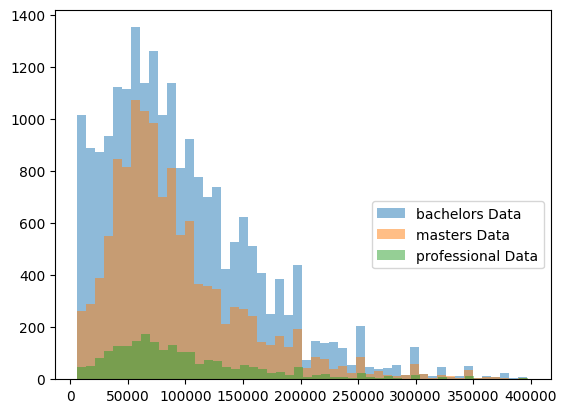

In [ ]:
plt.hist(bachelor_data['Q82'], bins=50, alpha=0.5, label='bachelors Data') #quick graph to check the skewed data
plt.hist(masters_data['Q82'], bins=50, alpha=0.5, label='masters Data')
plt.hist(professional_data['Q82'], bins=50, alpha=0.5, label='professional Data')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

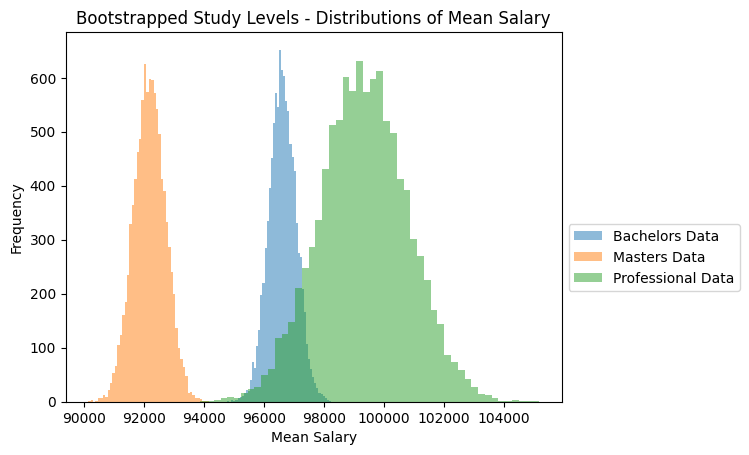

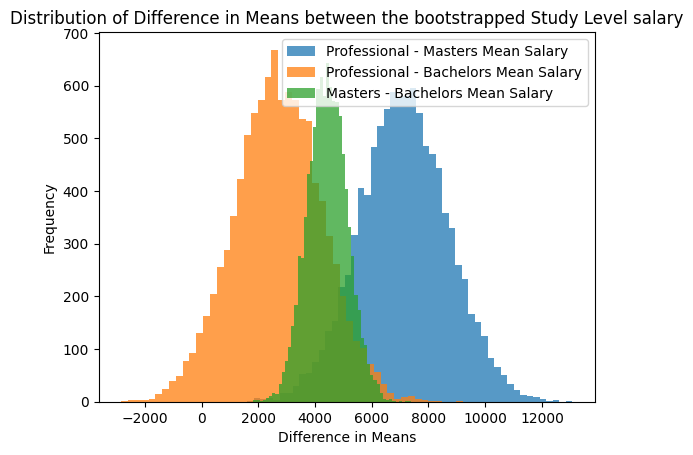

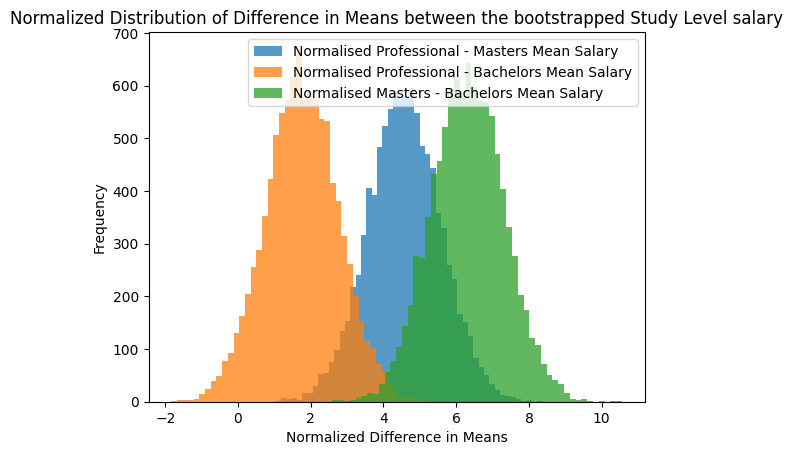

In [ ]:
bachelors_bootstraps = bootstrap(bachelor_data['Q82'].values, num_replications) #bootstrap sampling for each group using the already defined function
masters_bootstraps = bootstrap(masters_data['Q82'].values, num_replications)
professional_bootstraps = bootstrap(professional_data['Q82'].values, num_replications)

bachelors_means = np.mean(bachelors_bootstraps, axis=1) #calculating the mean salary of each bootstrap sample for each group
masters_means = np.mean(masters_bootstraps, axis=1)
professional_means = np.mean(professional_bootstraps, axis=1)

diff_means_1 = professional_means - masters_means #computing the difference in means between each two groups
diff_means_2 = professional_means - bachelors_means
diff_means_3 = bachelors_means - masters_means

plt.hist(bachelors_means, bins=50, alpha=0.5, label='Bachelors Data') #graphing the frequency of each group bootsrapped means
plt.hist(masters_means, bins=50, alpha=0.5, label='Masters Data')
plt.hist(professional_means, bins=50, alpha=0.5, label='Professional Data')
plt.title('Bootstrapped Study Levels - Distributions of Mean Salary')
plt.xlabel('Mean Salary')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

plt.hist(diff_means_1, bins=50, alpha=0.75, label='Professional - Masters Mean Salary') #graphing the difference in means
plt.hist(diff_means_2, bins=50, alpha=0.75, label='Professional - Bachelors Mean Salary')
plt.hist(diff_means_3, bins=50, alpha=0.75, label='Masters - Bachelors Mean Salary')
plt.title('Distribution of Difference in Means between the bootstrapped Study Level salary')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(diff_means_1 / np.std(diff_means_1), bins=50, alpha=0.75, label='Normalised Professional - Masters Mean Salary') #graphing the normalized distribution of the difference in means
plt.hist(diff_means_2 / np.std(diff_means_2), bins=50, alpha=0.75, label='Normalised Professional - Bachelors Mean Salary')
plt.hist(diff_means_3 / np.std(diff_means_3), bins=50, alpha=0.75, label='Normalised Masters - Bachelors Mean Salary')
plt.title('Normalized Distribution of Difference in Means between the bootstrapped Study Level salary')
plt.xlabel('Normalized Difference in Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##Performing an Anova Test For The 3 Groups After Bootstrapping

In [ ]:
Study_levels_combined = np.concatenate([bachelors_means, masters_means, professional_means]) #combining the groups to be used in the pingouin welch anova package
anova_data_2 = pd.DataFrame({'Q82': Study_levels_combined, 'Q6': np.repeat(['bachelors', 'masters', 'professional'], repeats=10000)}) #turning them into a Pandas Dataframe
pg.welch_anova(dv='Q82', between='Q6', data=anova_data_2) #performing welch anova package over the salaries based on the three study levels

,Source,ddof1,ddof2,F,p-unc,np2
0,Q6,2,18232.432168,246779.182635,0.0,0.908644
